In [1]:
!python --version

Python 3.10.13


In [2]:
!pip install cx_Oracle -q

In [9]:
import cx_Oracle
import pandas as pd

#데이터 베이스 연결
con = cx_Oracle.connect("c##hr", "hr", "localhost:1521/xe")
#데이터 베이스와의 상호작용을 위한 커서를 생성
cur = con.cursor()
#employees 테이블의 모든 데이터를 선택하는 쿼리를 실행
cur.execute('select * from employees')
#쿼리 결과를 모두 가져와  res 변수에 저장
res = cur.fetchall()
#데이터를 데이터 프레임으로 변환
df = pd.DataFrame(res)
df

,0,1,2,3,4,5,6,7,8,9,10
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...
102,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,NaN,201.0,20.0
103,203,Susan,Mavris,SMAVRIS,515.123.7777,2002-06-07,HR_REP,6500.0,NaN,101.0,40.0
104,204,Hermann,Baer,HBAER,515.123.8888,2002-06-07,PR_REP,10000.0,NaN,101.0,70.0
105,205,Shelley,Higgins,SHIGGINS,515.123.8080,2002-06-07,AC_MGR,12008.0,NaN,101.0,110.0


In [10]:
#employees테이블의 컬럼 이름을 조회하는 쿼리를 실행
#col =[('EMPLOYEE_ID',), ('FIST_NAME', )] 이런식으로 되어있어 2중 for문으로 append()
cur.execute("select column_name from user_tab_columns where table_name='EMPLOYEES'")
#컬럼 이름 결과를 모두 가져와 col변수에 저장
col = cur.fetchall()
#컬럼 이름 리스트 생성
li= []
for i in col:
    for j in i:
        li.append(j)
#데이터프레임 컬럼 이름 설정
df.columns = li
print(df.head())
cur.close()
con.close()

   EMPLOYEE_ID FIRST_NAME LAST_NAME     EMAIL  PHONE_NUMBER  HIRE_DATE  \
0          100     Steven      King     SKING  515.123.4567 2003-06-17   
1          101      Neena   Kochhar  NKOCHHAR  515.123.4568 2005-09-21   
2          102        Lex   De Haan   LDEHAAN  515.123.4569 2001-01-13   
3          103  Alexander    Hunold   AHUNOLD  590.423.4567 2006-01-03   
4          104      Bruce     Ernst    BERNST  590.423.4568 2007-05-21   

    JOB_ID   SALARY  COMMISSION_PCT  MANAGER_ID  DEPARTMENT_ID  
0  AD_PRES  24000.0             NaN         NaN           90.0  
1    AD_VP  17000.0             NaN       100.0           90.0  
2    AD_VP  17000.0             NaN       100.0           90.0  
3  IT_PROG   9000.0             NaN       102.0           60.0  
4  IT_PROG   6000.0             NaN       103.0           60.0  


In [11]:
df

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...
102,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,NaN,201.0,20.0
103,203,Susan,Mavris,SMAVRIS,515.123.7777,2002-06-07,HR_REP,6500.0,NaN,101.0,40.0
104,204,Hermann,Baer,HBAER,515.123.8888,2002-06-07,PR_REP,10000.0,NaN,101.0,70.0
105,205,Shelley,Higgins,SHIGGINS,515.123.8080,2002-06-07,AC_MGR,12008.0,NaN,101.0,110.0


In [12]:
df.describe()

,EMPLOYEE_ID,HIRE_DATE,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
count,107.000000,107,107.000000,35.000000,106.000000,106.000000
mean,153.000000,2005-11-09 04:15:42.056074752,6461.831776,0.222857,124.764151,63.207547
min,100.000000,2001-01-13 00:00:00,2100.000000,0.100000,100.000000,10.000000
25%,126.500000,2005-02-07 12:00:00,3100.000000,0.150000,108.000000,50.000000
50%,153.000000,2006-01-03 00:00:00,6200.000000,0.200000,122.000000,50.000000
75%,179.500000,2007-02-15 00:00:00,8900.000000,0.300000,145.000000,80.000000
max,206.000000,2008-04-21 00:00:00,24000.000000,0.400000,205.000000,110.000000
std,31.032241,NaN,3909.579731,0.085184,20.315395,20.910110


<Axes: ylabel='Frequency'>

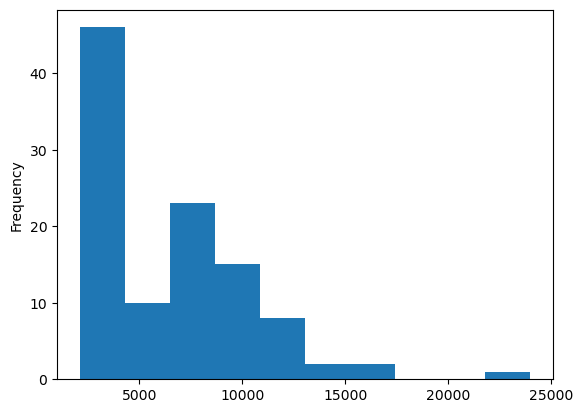

In [13]:
#시각화는 인사이트 발견을 위해 사용
#히스토그램은 분포 알기 위해 사용
df.SALARY.plot(kind='hist')

df.COMMISSION_PCT.plot(kind='hist')

<Axes: ylabel='Frequency'>

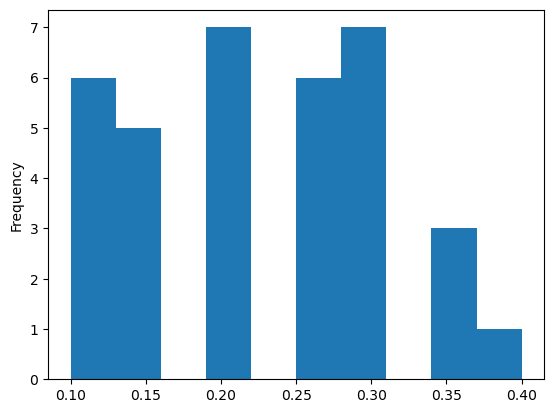

In [15]:
df.COMMISSION_PCT.plot(kind='hist')

In [16]:
#drop


In [18]:
#create
import cx_Oracle
conn = cx_Oracle.connect("c##hr", "hr", "localhost:1521/xe")
cs = conn.cursor()
sql = "create table sample1(id varchar2(10), score number)"
cs.execute(sql)

In [ ]:
#insert
sql = "insert into sample1 (id, score) values (1, 100)"

#### 바인드 변수
- 인덱스를 사용하여 데이터 시퀀스의 각 요소를 SQL 문에 바인딩

#### 바인드 변수의 장점:
- 보안: SQL 인젝션 공격을 방지할 수 있다. 바인드 변수를 사용하면 입력 데이터가 SQL 구문으로 해석되지 않고 단순한 값으로 처리된다.- 
- 성능: 동일한 SQL 명령어를 반복 실행할 때 SQL 문을 파싱하고 컴파일하는 시간을 절약할 수 있다
- 가독성: 코드를 보다 명확하게 하고 유지보수를 쉽게 할 있다.

In [19]:
#insert(여러개 입력)
#:1과:2는 바인딩 변수로, 나중에 값을 대체하여 사용
for i in range(10):
    sql = "insert into sample1 values (:1, :2)"
    cs.execute(sql, (i, 100*i))
conn.commit()

In [21]:
cs.execute("select * from sample1")
res = cs.fetchall()
df = pd.DataFrame(res)
df.head()

,0,1
0,0,0
1,1,100
2,2,200
3,3,300
4,4,400


In [22]:
#update
sql = "update sample1 set score=50 where id='0'"
cs.execute(sql)
cs.close()
conn.commit()
conn.close()